In [3]:
#Standard imports
import numpy as np
import healpy as hp
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
import fitsio
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [19]:
#VAST imports
from vast.voidfinder.voidfinder_functions import xyz_to_radecz
from VoidVolume import volume_of_spheres

In [2]:
#Python files
import VoidSlicePlots as vsp

### Load voids and galaxies

The below files are either generated by SDSS_VoidFinder_dr7_grid_test.py or are provided in the VAST example scripts. File paths should be respecified as needed when rerunning the code

In [5]:
ecgo_max = Table.read("0_empty_cells_grid_origin_maximals.txt", format = "ascii.commented_header")
ecgs_max = Table.read("1_empty_cells_grid_shifted_maximals.txt", format = "ascii.commented_header")
acgo_max = Table.read("2_all_cells_grid_origin_maximals.txt", format = "ascii.commented_header")
acgs_max =Table.read("3_all_cells_grid_shifted_maximals.txt", format = "ascii.commented_header")

In [6]:
ecgo_hole = Table.read("0_empty_cells_grid_origin_holes.txt", format = "ascii.commented_header")
ecgs_hole = Table.read("1_empty_cells_grid_shifted_holes.txt", format = "ascii.commented_header")
acgo_hole = Table.read("2_all_cells_grid_origin_holes.txt", format = "ascii.commented_header")
acgs_hole =Table.read("3_all_cells_grid_shifted_holes.txt", format = "ascii.commented_header")

In [12]:
gals =Table.read("vollim_dr7_cbp_102709.dat", format = "ascii.commented_header")

### Compare the void counts

In [14]:
#The amount by which the shifted catalogs have had their grid displaced
#from the origin (Mpc/h)
shift = 1.1

In [15]:
#compare counts
print(f"Empty cells only, grid at origin: {len(ecgo_max)} voids")
print(f"Empty cells only, grid shifted by {shift} Mpc/h: {len(ecgs_max)} voids")
print(f"All cells, grid at origin: {len(acgo_max)} voids")
print(f"All cells, grid shifted by {shift} Mpc/h: {len(acgs_max)} voids")

Empty cells only, grid at origin: 897 voids
Empty cells only, grid shifted by 1.1 Mpc/h: 895 voids
All cells, grid at origin: 900 voids
All cells, grid shifted by 1.1 Mpc/h: 903 voids


### Slice Plots

In [20]:
ecgo_hole = xyz_to_radecz(ecgo_hole)
ecgs_hole = xyz_to_radecz(ecgs_hole)
acgo_hole = xyz_to_radecz(acgo_hole)
acgs_hole =xyz_to_radecz(acgs_hole)

In [ ]:
vm_ecgo = vsp.VoidMap(gals,ecgo_max,ecgo_hole)
vm_ecgs = vsp.VoidMap(gals,ecgs_max,ecgs_hole)
vm_acgo = vsp.VoidMap(gals,acgo_max,acgo_hole)
vm_acgs = vsp.VoidMap(gals,acgs_max,acgs_hole)

Empty cells only, grid at origin


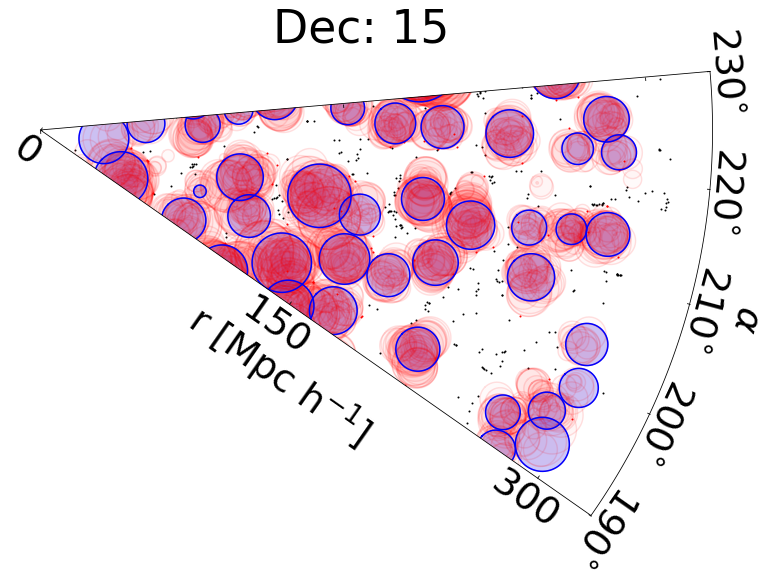

In [23]:
print("Empty cells only, grid at origin")
sdss_slice_plot = vm_ecgo.pvf1(15,1,1000, 190, 230, 0, .114)

Empty cells only, grid shifted by 1.1 Mpc/h


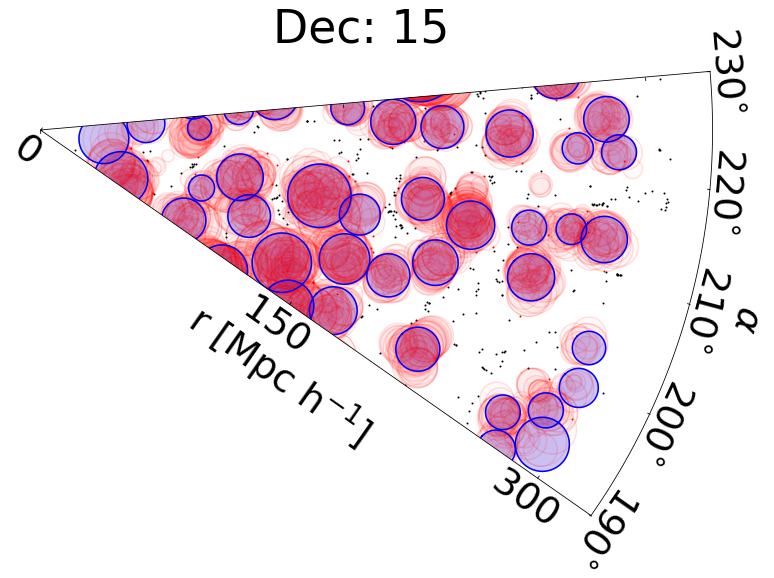

In [24]:
print(f"Empty cells only, grid shifted by {shift} Mpc/h")
sdss_slice_plot = vm_ecgs.pvf1(15,1,1000, 190, 230, 0, .114)

All cells, grid at origin


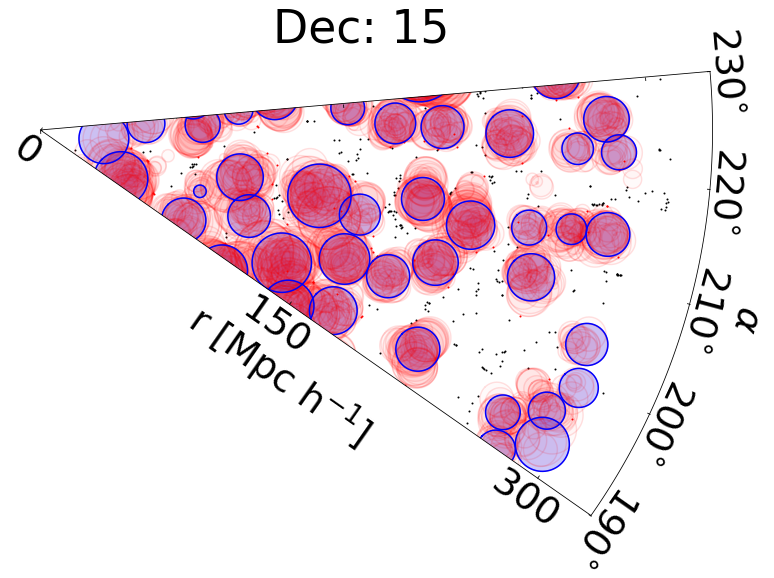

In [25]:
print("All cells, grid at origin")
sdss_slice_plot = vm_acgo.pvf1(15,1,1000, 190, 230, 0, .114)

All cells, grid shifted by 1.1 Mpc/h


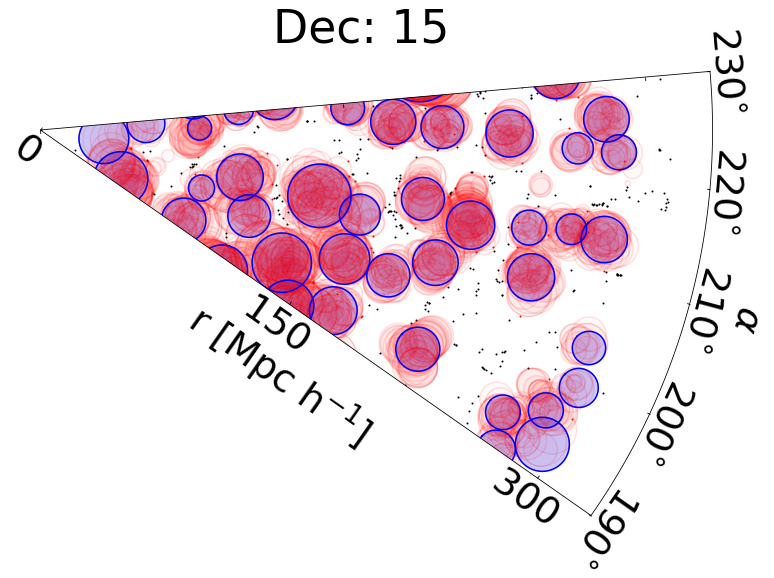

In [26]:
print(f"All cells, grid shifted by {shift} Mpc/h")
sdss_slice_plot = vm_acgs.pvf1(15,1,1000, 190, 230, 0, .114)

### Calculate Void Volumes and Display the Void Spectrum

In [32]:
ecgo_volumes=np.zeros((len(ecgo_max),5))
array_of_row = lambda row: np.lib.recfunctions.structured_to_unstructured(np.array(row))
for i in range(0, len(ecgo_max)):
    flag=ecgo_max[i]["flag"]
    maximal = array_of_row(ecgo_max[i]["x","y","z","radius"])
    holes = array_of_row(ecgo_hole[np.where(ecgo_hole["flag"]==flag)]["x","y","z","radius"])
    xyzr = np.vstack((maximal, holes))
    ivol, idv, uvol, udv = volume_of_spheres(xyzr[:,:-1], xyzr[:,-1])
    ecgo_volumes[i] = np.array([ivol, idv, uvol, udv, flag])

In [34]:
np.savetxt("ecgo_volumes.txt",ecgo_volumes,header="ivol idv uvol udv flag")

In [35]:
ecgs_volumes=np.zeros((len(ecgs_max),5))
for i in range(0, len(ecgs_max)):
    flag=ecgs_max[i]["flag"]
    maximal = array_of_row(ecgs_max[i]["x","y","z","radius"])
    holes = array_of_row(ecgs_hole[np.where(ecgs_hole["flag"]==flag)]["x","y","z","radius"])
    xyzr = np.vstack((maximal, holes))
    ivol, idv, uvol, udv = volume_of_spheres(xyzr[:,:-1], xyzr[:,-1])
    ecgs_volumes[i] = np.array([ivol, idv, uvol, udv, flag])



In [36]:
np.savetxt("ecgs_volumes.txt",ecgs_volumes,header="ivol idv uvol udv flag")

In [37]:
acgo_volumes=np.zeros((len(acgo_max),5))
for i in range(0, len(acgo_max)):
    flag=acgo_max[i]["flag"]
    maximal = array_of_row(acgo_max[i]["x","y","z","radius"])
    holes = array_of_row(acgo_hole[np.where(acgo_hole["flag"]==flag)]["x","y","z","radius"])
    xyzr = np.vstack((maximal, holes))
    ivol, idv, uvol, udv = volume_of_spheres(xyzr[:,:-1], xyzr[:,-1])
    acgo_volumes[i] = np.array([ivol, idv, uvol, udv, flag])

In [38]:
np.savetxt("acgo_volumes.txt",acgo_volumes,header="ivol idv uvol udv flag")

In [39]:
acgs_volumes=np.zeros((len(acgs_max),5))
for i in range(0, len(acgs_max)):
    flag=acgs_max[i]["flag"]
    maximal = array_of_row(acgs_max[i]["x","y","z","radius"])
    holes = array_of_row(acgs_hole[np.where(acgs_hole["flag"]==flag)]["x","y","z","radius"])
    xyzr = np.vstack((maximal, holes))
    ivol, idv, uvol, udv = volume_of_spheres(xyzr[:,:-1], xyzr[:,-1])
    acgs_volumes[i] = np.array([ivol, idv, uvol, udv, flag])


In [40]:
np.savetxt("acgs_volumes.txt",acgs_volumes,header="ivol idv uvol udv flag")

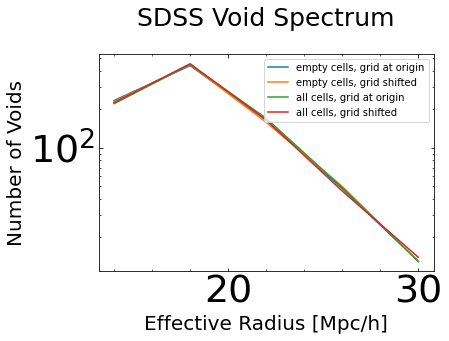

In [59]:
counts, bins = np.histogram(((3/4)*ecgo_volumes[:,2]/np.pi)**(1/3),bins=5, range = (10,30))
dx=bins[1]-bins[0]
plt.plot(bins[:-1]+dx,counts,label="empty cells, grid at origin")
#plt.errorbar(bins[:-1]+dx,counts,yerr=np.sqrt(counts))

counts, bins = np.histogram(((3/4)*ecgs_volumes[:,2]/np.pi)**(1/3),bins=5, range = (10,30))
dx=bins[1]-bins[0]
plt.plot(bins[:-1]+dx,counts,label="empty cells, grid shifted")
#plt.errorbar(bins[:-1]+dx,counts,yerr=np.sqrt(counts))

counts, bins = np.histogram(((3/4)*acgo_volumes[:,2]/np.pi)**(1/3),bins=5, range = (10,30))
dx=bins[1]-bins[0]
plt.plot(bins[:-1]+dx,counts,label="all cells, grid at origin")
#plt.errorbar(bins[:-1]+dx,counts,yerr=np.sqrt(counts))

counts, bins = np.histogram(((3/4)*acgs_volumes[:,2]/np.pi)**(1/3),bins=5, range = (10,30))
dx=bins[1]-bins[0]
plt.plot(bins[:-1]+dx,counts,label="all cells, grid shifted")
#plt.errorbar(bins[:-1]+dx,counts,yerr=np.sqrt(counts))

plt.xlabel("Effective Radius [Mpc/h]",fontsize=20)
plt.ylabel("Number of Voids",fontsize=20)
plt.title("SDSS Void Spectrum",y=1.1,fontsize=25)
plt.legend(loc="upper right",fontsize=10)
plt.yscale("log")